In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [125]:
data = "../DataSets/Clustering/Cust_Segmentation.csv"
df = pd.read_csv(data)

In [126]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [127]:
clust_df = df.drop('Address', axis = 1)

In [128]:
clust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [129]:
x = clust_df.values[:, 1:]
x[:3]

array([[ 41.   ,   2.   ,   6.   ,  19.   ,   0.124,   1.073,   0.   ,
          6.3  ],
       [ 47.   ,   1.   ,  26.   , 100.   ,   4.582,   8.218,   0.   ,
         12.8  ],
       [ 33.   ,   2.   ,  10.   ,  57.   ,   6.111,   5.802,   1.   ,
         20.9  ]])

In [130]:
x = np.nan_to_num(x)
x[:3]

array([[ 41.   ,   2.   ,   6.   ,  19.   ,   0.124,   1.073,   0.   ,
          6.3  ],
       [ 47.   ,   1.   ,  26.   , 100.   ,   4.582,   8.218,   0.   ,
         12.8  ],
       [ 33.   ,   2.   ,  10.   ,  57.   ,   6.111,   5.802,   1.   ,
         20.9  ]])

In [131]:
scaler = StandardScaler()
clust_scaler = scaler.fit_transform(x)

In [132]:
clust_scaler[:3]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385]])

In [133]:
clusterName = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterName, n_init = 12)
k_means.fit(clust_scaler)
lables = k_means.labels_
print(lables)

[0 2 1 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 1 2 2 0 0 0 0 0 0 2 1 0 0 0 1
 1 0 2 1 2 0 2 0 2 0 0 0 0 2 2 1 0 1 1 1 0 0 0 2 0 2 2 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 2 0 0 1 2 0 2 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1
 0 0 0 2 1 0 0 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 2 1
 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 2 0 1 0 0 1 0 2 0 1 0 0 0 0 0 1 1 2 0 0 1 2
 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 1 0 1 0
 0 0 2 0 1 2 1 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0
 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 2 1
 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 0 1 0 0 0 2 2 0
 1 0 2 1 1 0 0 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 1 1
 2 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 0 0 0 2 0 0 0 0 2
 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 1 0
 1 0 0 0 0 0 2 1 1 0 2 0 

In [134]:
clust_df['clust_km'] = lables

In [135]:
clust_df[:3]

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clust_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1


In [136]:
clust_df.groupby('clust_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clust_km,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


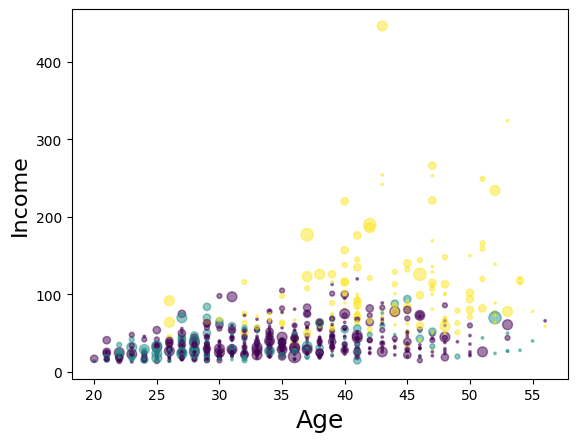

In [137]:
area = np.pi * (x[:,1]) ** 2
plt.scatter(x[:,0], x[:,3], s = area, c = lables.astype(np.float64), alpha = 0.5)
plt.xlabel("Age", fontsize = 18)
plt.ylabel("Income", fontsize = 16)
plt.show()

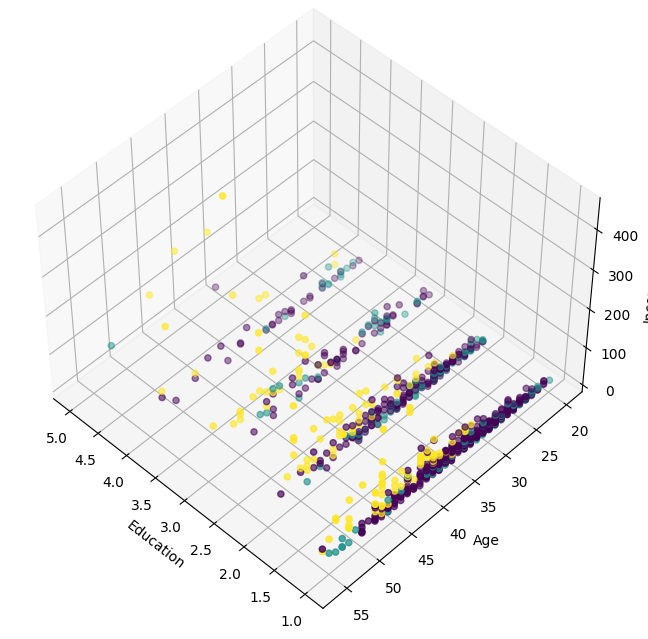

In [138]:
fig = plt.figure(1, figsize = (8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev = 48, azim = 134)
fig.add_axes(ax)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(x[:,1], x[:,0], x[:,3], c = lables.astype(np.float64))

c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

Text(0, 0.5, 'Sum of squared distance')

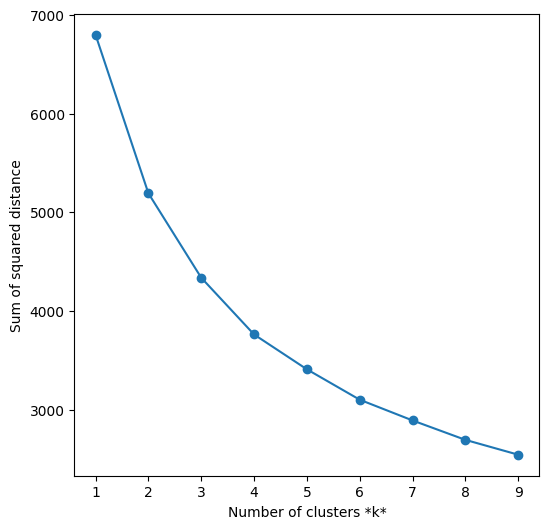

In [139]:
#Elbow Method
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(clust_scaler)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')